In [2]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
import numpy as np
import librosa.display
import signal
import sys
import pylab as plt
from essentia.streaming import *

plt.rcParams['figure.figsize'] = (14,4)

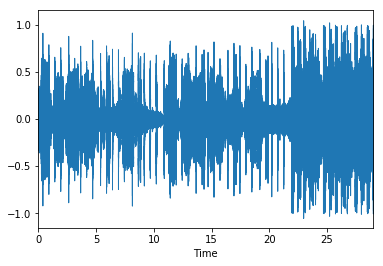

In [3]:
x, fs = librosa.load('Sia - Chandelier.mp3')
#x = x[75*fs:fs*105]
x = x[1*fs:fs*30]
librosa.display.waveplot(x, sr=fs)
#source: http://www.theory.physics.ubc.ca/341-current/sweep.html
IPython.display.Audio(x, rate=fs)

BPM: 120.0
Most prominent peak: 120.0 BPM
Centroid: 123.5


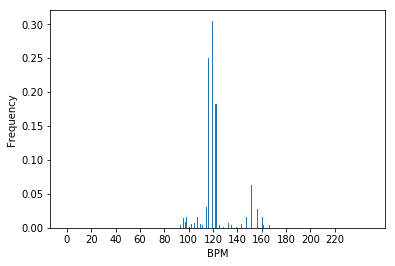

In [11]:
try:
    audiofile = 'My Sweet Shadow Live.wav'
except:
    print ("usage: %s <audiofile>" % sys.argv[0])
    sys.exit()

pool = essentia.Pool()

loader = MonoLoader(filename = audiofile)
bt = RhythmExtractor2013()
bpm_histogram = BpmHistogramDescriptors()
centroid = Centroid(range=250) # BPM histogram output size is 250

loader.audio >> bt.signal
bt.bpm >> (pool, 'bpm')
bt.ticks >> None
bt.confidence >> None
bt.estimates >> None
bt.bpmIntervals >> bpm_histogram.bpmIntervals
bpm_histogram.firstPeakBPM >> (pool, 'bpm_first_peak')
bpm_histogram.firstPeakWeight >> None
bpm_histogram.firstPeakSpread >> None
bpm_histogram.secondPeakBPM >> (pool, 'bpm_second_peak')
bpm_histogram.secondPeakWeight >> None
bpm_histogram.secondPeakSpread >> None
bpm_histogram.histogram >> (pool, 'bpm_histogram')
bpm_histogram.histogram >> centroid.array
centroid.centroid >> (pool, 'bpm_centroid')

essentia.run(loader)
print("BPM: %0.1f" % pool['bpm'])
print("Most prominent peak: %0.1f BPM" % pool['bpm_first_peak'][0])
print("Centroid: %0.1f" % pool['bpm_centroid'][0]) 

histogram = pool['bpm_histogram'][0]

fig, ax = plt.subplots()
ax.bar(range(len(histogram)), histogram, width=1)
ax.set_xlabel('BPM')
ax.set_ylabel('Frequency')
ax.set_xticks([20 * x + 0.5 for x in range(int(len(histogram) / 20))])
ax.set_xticklabels([str(20 * x) for x in range(int(len(histogram) / 20))])
plt.show()

BPM: 119.9
Most prominent peak: 120.0 BPM
Centroid: 127.7


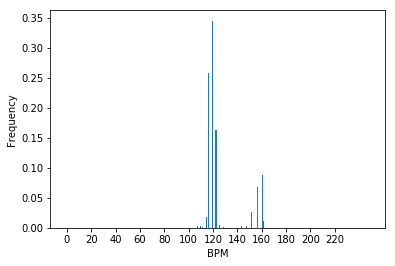

In [12]:
try:
    audiofile = 'My Sweet Shadow.mp3'
except:
    print ("usage: %s <audiofile>" % sys.argv[0])
    sys.exit()

pool = essentia.Pool()

loader = MonoLoader(filename = audiofile)
bt = RhythmExtractor2013()
bpm_histogram = BpmHistogramDescriptors()
centroid = Centroid(range=250) # BPM histogram output size is 250

loader.audio >> bt.signal
bt.bpm >> (pool, 'bpm')
bt.ticks >> None
bt.confidence >> None
bt.estimates >> None
bt.bpmIntervals >> bpm_histogram.bpmIntervals
bpm_histogram.firstPeakBPM >> (pool, 'bpm_first_peak')
bpm_histogram.firstPeakWeight >> None
bpm_histogram.firstPeakSpread >> None
bpm_histogram.secondPeakBPM >> (pool, 'bpm_second_peak')
bpm_histogram.secondPeakWeight >> None
bpm_histogram.secondPeakSpread >> None
bpm_histogram.histogram >> (pool, 'bpm_histogram')
bpm_histogram.histogram >> centroid.array
centroid.centroid >> (pool, 'bpm_centroid')

essentia.run(loader)
print("BPM: %0.1f" % pool['bpm'])
print("Most prominent peak: %0.1f BPM" % pool['bpm_first_peak'][0])
print("Centroid: %0.1f" % pool['bpm_centroid'][0]) 

histogram = pool['bpm_histogram'][0]

fig, ax = plt.subplots()
ax.bar(range(len(histogram)), histogram, width=1)
ax.set_xlabel('BPM')
ax.set_ylabel('Frequency')
ax.set_xticks([20 * x + 0.5 for x in range(int(len(histogram) / 20))])
ax.set_xticklabels([str(20 * x) for x in range(int(len(histogram) / 20))])
plt.show()